## IE582 HW3
#### Çiğdem Renkli 

In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,log_loss
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import pairwise_distances

### Task 1 – On the use of distance information for UwaveGesture Recognition Task

* Read X data - train & test
* Check the shape of data and distribution of classes

In [2]:
X_train = pd.read_csv('uWaveGestureLibrary_X_TRAIN.csv', sep=';', header=None)
print('Data shape: ',X_train.shape)
X_train.columns = ['class']+['x'+str(x) for x in range(1,X_train.shape[1])]
X_train['class']=X_train['class'].astype(int)
X_train.head()

Data shape:  (896, 316)


,class,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x306,x307,x308,x309,x310,x311,x312,x313,x314,x315
0,6,-0.30400,-0.30400,-0.30400,-0.30400,-0.30400,-0.30400,-0.30400,-0.30400,-0.30400,...,-0.796,-0.742,-0.695,-0.648,-0.648,-0.6480,-0.6480,-0.6480,-0.6480,-0.6480
1,5,1.63000,1.63000,1.63000,1.63000,1.63000,1.63000,1.63000,1.63000,1.63000,...,-0.238,-0.238,-0.238,-0.238,-0.238,-0.2380,-0.2380,-0.2380,-0.2380,-0.2380
2,5,0.66100,0.66100,0.66100,0.66100,0.66100,0.66100,0.66100,0.66100,0.66100,...,-0.282,-0.237,-0.192,-0.147,-0.102,-0.0612,-0.0566,-0.0555,-0.0555,-0.0555
3,3,0.00518,0.00518,0.00518,0.00518,0.00518,0.00518,0.00518,0.00518,0.00518,...,1.210,1.150,1.090,1.060,1.050,1.0400,1.0200,0.9100,0.7910,0.6720
4,4,1.29000,1.29000,1.29000,1.29000,1.29000,1.29000,1.29000,1.29000,1.29000,...,-1.440,-1.440,-1.440,-1.440,-1.440,-1.4400,-1.4500,-1.4700,-1.4800,-1.5000


In [3]:
print('Number of null observations: ',X_train.isnull().any().sum())
print('Class counts: ')
print(X_train['class'].value_counts().sort_index())
print('Class percents: ')
print(X_train['class'].value_counts().sort_index()*100/X_train.shape[0])

Number of null observations:  0
Class counts: 
1    122
2    108
3    106
4    110
5    127
6    111
7    112
8    100
Name: class, dtype: int64
Class percents: 
1    13.616071
2    12.053571
3    11.830357
4    12.276786
5    14.174107
6    12.388393
7    12.500000
8    11.160714
Name: class, dtype: float64


In [4]:
X_test = pd.read_csv('uWaveGestureLibrary_X_TEST.csv', sep=';', header=None)
print('Data shape: ',X_test.shape)
X_test.columns = ['class']+['x'+str(x) for x in range(1,X_test.shape[1])]
X_test['class']=X_test['class'].astype(int)
X_test.head()

Data shape:  (3582, 316)


,class,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x306,x307,x308,x309,x310,x311,x312,x313,x314,x315
0,5,1.5600,1.5600,1.5600,1.5600,1.5600,1.5600,1.5600,1.5600,1.5600,...,-0.955,-0.955,-0.955,-0.955,-0.955,-0.955,-0.955,-0.955,-0.955,-0.955
1,1,-0.0751,-0.0751,-0.0751,-0.0751,-0.0751,-0.0751,-0.0751,-0.0751,-0.0751,...,-0.479,-0.434,-0.390,-0.345,-0.328,-0.320,-0.320,-0.320,-0.320,-0.320
2,4,1.5100,1.5300,1.5400,1.5600,1.5700,1.5800,1.5800,1.5800,1.5800,...,-0.578,-0.575,-0.569,-0.561,-0.553,-0.546,-0.544,-0.544,-0.544,-0.544
3,4,1.3000,1.3000,1.3000,1.3000,1.3000,1.3000,1.3000,1.3000,1.3000,...,-1.290,-1.300,-1.320,-1.330,-1.340,-1.360,-1.370,-1.380,-1.400,-1.410
4,5,1.3000,1.3000,1.3000,1.3000,1.3000,1.3000,1.3000,1.3000,1.3000,...,-0.517,-0.499,-0.481,-0.463,-0.444,-0.426,-0.408,-0.390,-0.372,-0.354


In [5]:
print('Number of null observations: ',X_test.isnull().any().sum())
print('Class counts: ')
print(X_test['class'].value_counts().sort_index())
print('Class percents: ')
print(X_test['class'].value_counts().sort_index()*100/X_test.shape[0])

Number of null observations:  0
Class counts: 
1    437
2    452
3    454
4    450
5    433
6    449
7    447
8    460
Name: class, dtype: int64
Class percents: 
1    12.199888
2    12.618649
3    12.674484
4    12.562814
5    12.088219
6    12.534897
7    12.479062
8    12.841988
Name: class, dtype: float64


*  Distribution of classes are very similar in train and test data

- Read Y data - train & test

In [6]:
Y_train = pd.read_csv('uWaveGestureLibrary_Y_TRAIN.csv', sep=';', header=None)
print('Data shape: ',Y_train.shape)
Y_train.columns = ['class']+['y'+str(x) for x in range(1,Y_train.shape[1])]
Y_train['class']=Y_train['class'].astype(int)
Y_train.head()

Data shape:  (896, 316)


,class,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y306,y307,y308,y309,y310,y311,y312,y313,y314,y315
0,6,-2.120,-2.120,-2.120,-2.120,-2.120,-2.120,-2.120,-2.120,-2.120,...,0.0841,0.0841,0.0841,0.0841,0.0841,0.0841,0.0841,0.0841,0.0841,0.0841
1,5,0.667,0.667,0.667,0.667,0.667,0.667,0.667,0.667,0.667,...,-1.5200,-1.5500,-1.5900,-1.6300,-1.6600,-1.6600,-1.6600,-1.6600,-1.6600,-1.6600
2,5,-0.190,-0.190,-0.190,-0.190,-0.190,-0.190,-0.190,-0.190,-0.190,...,-1.4900,-1.4900,-1.4900,-1.4900,-1.4900,-1.4900,-1.4900,-1.4900,-1.4900,-1.4900
3,3,0.374,0.374,0.374,0.374,0.374,0.374,0.374,0.374,0.374,...,-1.5300,-1.6400,-1.7500,-1.8400,-1.9000,-1.9300,-1.9200,-1.6600,-1.3700,-1.0900
4,4,-0.397,-0.397,-0.397,-0.397,-0.397,-0.397,-0.397,-0.397,-0.397,...,-2.1800,-2.2200,-2.2400,-2.2400,-2.2400,-2.2300,-2.1900,-2.1300,-2.0700,-2.0100


In [7]:
Y_test = pd.read_csv('uWaveGestureLibrary_Y_TEST.csv', sep=';', header=None)
print('Data shape: ',Y_test.shape)
Y_test.columns = ['class']+['y'+str(x) for x in range(1,Y_test.shape[1])]
Y_test['class']=Y_test['class'].astype(int)
Y_test.head()

Data shape:  (3582, 316)


,class,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y306,y307,y308,y309,y310,y311,y312,y313,y314,y315
0,5,1.170,1.170,1.170,1.170,1.170,1.170,1.170,1.170,1.170,...,-1.220,-1.220,-1.220,-1.230,-1.230,-1.240,-1.240,-1.250,-1.260,-1.260
1,1,-1.110,-1.110,-1.110,-1.110,-1.110,-1.110,-1.110,-1.110,-1.110,...,1.340,1.340,1.340,1.340,1.340,1.340,1.340,1.380,1.430,1.490
2,4,-1.010,-0.969,-0.931,-0.893,-0.864,-0.858,-0.854,-0.854,-0.854,...,-0.445,-0.445,-0.445,-0.445,-0.447,-0.449,-0.458,-0.471,-0.484,-0.496
3,4,1.170,1.170,1.170,1.170,1.170,1.170,1.170,1.170,1.170,...,-1.120,-1.120,-1.120,-1.120,-1.140,-1.160,-1.190,-1.220,-1.250,-1.290
4,5,0.395,0.395,0.395,0.395,0.395,0.395,0.395,0.395,0.395,...,-1.630,-1.640,-1.650,-1.660,-1.660,-1.670,-1.680,-1.690,-1.700,-1.710


* Read Z data - train & test

In [8]:
Z_train = pd.read_csv('uWaveGestureLibrary_Z_TRAIN.csv', sep=';', header=None)
print('Data shape: ',Z_train.shape)
Z_train.columns = ['class']+['z'+str(x) for x in range(1,Z_train.shape[1])]
Z_train['class']=Z_train['class'].astype(int)
Z_train.head()

Data shape:  (896, 316)


,class,z1,z2,z3,z4,z5,z6,z7,z8,z9,...,z306,z307,z308,z309,z310,z311,z312,z313,z314,z315
0,6,-1.530,-1.530,-1.530,-1.530,-1.530,-1.530,-1.530,-1.530,-1.530,...,0.523,0.514,0.5030,0.4930,0.4750,0.456,0.438,0.419,0.401,0.382
1,5,1.790,1.790,1.790,1.790,1.790,1.790,1.790,1.790,1.790,...,-0.427,-0.427,-0.4270,-0.4270,-0.4290,-0.441,-0.453,-0.465,-0.477,-0.489
2,5,0.521,0.521,0.521,0.521,0.521,0.521,0.521,0.521,0.521,...,-0.863,-0.863,-0.8630,-0.8630,-0.8630,-0.863,-0.863,-0.863,-0.863,-0.863
3,3,0.309,0.309,0.309,0.309,0.309,0.309,0.309,0.309,0.309,...,-0.187,-0.124,-0.0559,0.0118,0.0795,0.157,0.254,0.446,0.649,0.852
4,4,-0.466,-0.466,-0.466,-0.466,-0.466,-0.466,-0.466,-0.466,-0.466,...,1.870,1.830,1.7600,1.6400,1.5200,1.450,1.520,1.630,1.750,1.870


In [9]:
Z_test = pd.read_csv('uWaveGestureLibrary_Z_TEST.csv', sep=';', header=None)
print('Data shape: ',Z_test.shape)
Z_test.columns = ['class']+['z'+str(x) for x in range(1,Z_test.shape[1])]
Z_test['class']=Z_test['class'].astype(int)
Z_test.head()

Data shape:  (3582, 316)


,class,z1,z2,z3,z4,z5,z6,z7,z8,z9,...,z306,z307,z308,z309,z310,z311,z312,z313,z314,z315
0,5,1.860,1.860,1.860,1.860,1.860,1.860,1.860,1.860,1.860,...,-0.348,-0.348,-0.345,-0.341,-0.333,-0.325,-0.318,-0.310,-0.302,-0.295
1,1,-0.352,-0.352,-0.352,-0.352,-0.352,-0.352,-0.352,-0.352,-0.352,...,0.961,0.849,0.726,0.589,0.539,0.516,0.516,0.516,0.516,0.516
2,4,0.650,0.650,0.650,0.650,0.650,0.650,0.650,0.650,0.650,...,-0.566,-0.476,-0.399,-0.344,-0.289,-0.234,-0.179,-0.124,-0.069,-0.014
3,4,-0.727,-0.727,-0.727,-0.727,-0.727,-0.727,-0.727,-0.727,-0.727,...,1.040,1.040,1.040,1.040,1.080,1.120,1.170,1.230,1.280,1.340
4,5,1.290,1.290,1.290,1.290,1.290,1.290,1.290,1.290,1.290,...,-0.693,-0.690,-0.686,-0.682,-0.679,-0.675,-0.671,-0.668,-0.664,-0.660


* Concatenate X-Y-Z components for train and test

In [10]:
concatenated_train = pd.merge(X_train,Y_train.drop('class',axis=1),how='left',left_index=True,right_index=True)
concatenated_train = pd.merge(concatenated_train,Z_train.drop('class',axis=1),how='left',left_index=True,right_index=True)
print('Data shape: ',concatenated_train.shape)
concatenated_train.head()

Data shape:  (896, 946)


,class,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,z306,z307,z308,z309,z310,z311,z312,z313,z314,z315
0,6,-0.30400,-0.30400,-0.30400,-0.30400,-0.30400,-0.30400,-0.30400,-0.30400,-0.30400,...,0.523,0.514,0.5030,0.4930,0.4750,0.456,0.438,0.419,0.401,0.382
1,5,1.63000,1.63000,1.63000,1.63000,1.63000,1.63000,1.63000,1.63000,1.63000,...,-0.427,-0.427,-0.4270,-0.4270,-0.4290,-0.441,-0.453,-0.465,-0.477,-0.489
2,5,0.66100,0.66100,0.66100,0.66100,0.66100,0.66100,0.66100,0.66100,0.66100,...,-0.863,-0.863,-0.8630,-0.8630,-0.8630,-0.863,-0.863,-0.863,-0.863,-0.863
3,3,0.00518,0.00518,0.00518,0.00518,0.00518,0.00518,0.00518,0.00518,0.00518,...,-0.187,-0.124,-0.0559,0.0118,0.0795,0.157,0.254,0.446,0.649,0.852
4,4,1.29000,1.29000,1.29000,1.29000,1.29000,1.29000,1.29000,1.29000,1.29000,...,1.870,1.830,1.7600,1.6400,1.5200,1.450,1.520,1.630,1.750,1.870


In [11]:
concatenated_test = pd.merge(X_test,Y_test.drop('class',axis=1),how='left',left_index=True,right_index=True)
concatenated_test = pd.merge(concatenated_test,Z_test.drop('class',axis=1),how='left',left_index=True,right_index=True)
print('Data shape: ',concatenated_test.shape)
concatenated_test.head()

Data shape:  (3582, 946)


,class,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,z306,z307,z308,z309,z310,z311,z312,z313,z314,z315
0,5,1.5600,1.5600,1.5600,1.5600,1.5600,1.5600,1.5600,1.5600,1.5600,...,-0.348,-0.348,-0.345,-0.341,-0.333,-0.325,-0.318,-0.310,-0.302,-0.295
1,1,-0.0751,-0.0751,-0.0751,-0.0751,-0.0751,-0.0751,-0.0751,-0.0751,-0.0751,...,0.961,0.849,0.726,0.589,0.539,0.516,0.516,0.516,0.516,0.516
2,4,1.5100,1.5300,1.5400,1.5600,1.5700,1.5800,1.5800,1.5800,1.5800,...,-0.566,-0.476,-0.399,-0.344,-0.289,-0.234,-0.179,-0.124,-0.069,-0.014
3,4,1.3000,1.3000,1.3000,1.3000,1.3000,1.3000,1.3000,1.3000,1.3000,...,1.040,1.040,1.040,1.040,1.080,1.120,1.170,1.230,1.280,1.340
4,5,1.3000,1.3000,1.3000,1.3000,1.3000,1.3000,1.3000,1.3000,1.3000,...,-0.693,-0.690,-0.686,-0.682,-0.679,-0.675,-0.671,-0.668,-0.664,-0.660


* Separate features and labels

In [12]:
C_train = concatenated_train.drop('class',axis=1)
L_train = concatenated_train[['class']]

C_test = concatenated_test.drop('class',axis=1)
L_test = concatenated_test[['class']]

#### Part a

* I will use two distance measures for computing similarity between two time series : 
    1. Euclidean distance 
    2. Manhattan distance

* First for Euclidean distance, I will use the training data to identify the ideal value of k which minimizes the error of a 10-fold cross-validation using GridSearchCV. I will try values of k from 2 to 20.

* Normally, I would apply standardization first because KNN is sensitive to scaling but all features here are in similar units; so I will skip standardization

In [13]:
knn_euclidean_grids = GridSearchCV(KNeighborsClassifier(metric='euclidean'),
                                   {'n_neighbors':list(range(2,21))},
                                   cv=10,
                                   scoring='accuracy',
                                   verbose=1)

knn_euclidean_grids.fit(C_train,L_train['class'].ravel())

Fitting 10 folds for each of 19 candidates, totalling 190 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(metric='euclidean'),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20]},
             scoring='accuracy', verbose=1)

In [14]:
knn_euclidean_grids.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

* The ideal value of k which minimizes the error (maximizes the accuracy) of a 10-fold cross-validation is 3 for Euclidean distance

* Now, I will apply the same procedure using Mahalanobis distance

In [15]:
knn_manhattan_grids = GridSearchCV(KNeighborsClassifier(metric='manhattan'),
                                   {'n_neighbors':list(range(2,21))},
                                   cv=10,
                                   scoring='accuracy',
                                   verbose=1)

knn_manhattan_grids.fit(C_train,L_train['class'].ravel())

Fitting 10 folds for each of 19 candidates, totalling 190 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(metric='manhattan'),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20]},
             scoring='accuracy', verbose=1)

In [16]:
knn_manhattan_grids.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

* The ideal value of k which minimizes the error (maximizes the accuracy) of a 10-fold cross-validation is also 3 for Manhattan distance

#### Part a

##### For Euclidean distances:

<AxesSubplot:>

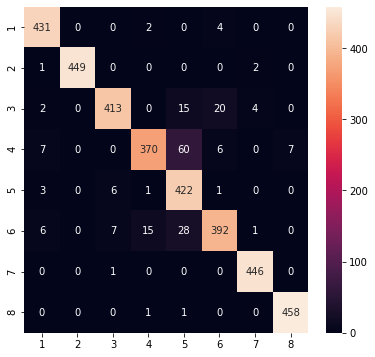

In [17]:
start = time.time()

#fit knn
knn_euc = KNeighborsClassifier(metric='euclidean',n_neighbors=3)
knn_euc.fit(C_train,L_train['class'].ravel())

#predict train labels and join with true labels
knn_euc_train_labels = pd.DataFrame(knn_euc.predict(C_train),columns=['class_pred'],index=C_train.index)
knn_euc_train_labels = pd.merge(knn_euc_train_labels,L_train,how='left',left_index=True,right_index=True)

#predict test labels and join with true labels
knn_euc_test_labels = pd.DataFrame(knn_euc.predict(C_test),columns=['class_pred'],index=C_test.index)
knn_euc_test_labels = pd.merge(knn_euc_test_labels,L_test,how='left',left_index=True,right_index=True)

end = time.time()
train_time_knn_euc = end - start

#accuracy calculation
knn_euc_train_acc = accuracy_score(knn_euc_train_labels['class'],knn_euc_train_labels['class_pred'])
knn_euc_test_acc = accuracy_score(knn_euc_test_labels['class'],knn_euc_test_labels['class_pred'])

#confusion matrix calculation
conf_matrix = pd.DataFrame(confusion_matrix(knn_euc_test_labels['class'],knn_euc_test_labels['class_pred']),columns=['1','2','3','4','5','6','7','8'],index=['1','2','3','4','5','6','7','8'])

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.heatmap(conf_matrix,annot=True,fmt='g')

In [18]:
print(f"Runtime is {train_time_knn_euc} seconds")
print(f"Train accuracy is {knn_euc_train_acc}")
print(f"Test accuracy is {knn_euc_test_acc}")

Runtime is 0.24035429954528809 seconds
Train accuracy is 0.9676339285714286
Test accuracy is 0.9438860971524288


#### Comments 

* Runtime is 0.24 seconds. Test accuracy is 94% which is a high value.
* Mostly misclassified gestures are 4 and 5. Also, gesture 3 is misclassified as 5 and 6; and gesture 6 is misclassified as 4 and 5.

##### For Manhattan distances:

<AxesSubplot:>

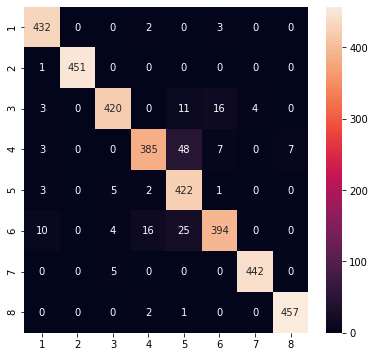

In [19]:
start = time.time()

#fit knn
knn_man = KNeighborsClassifier(metric='manhattan',n_neighbors=3)
knn_man.fit(C_train,L_train['class'].ravel())

#predict train labels and join with true labels
knn_man_train_labels = pd.DataFrame(knn_man.predict(C_train),columns=['class_pred'],index=C_train.index)
knn_man_train_labels = pd.merge(knn_man_train_labels,L_train,how='left',left_index=True,right_index=True)

#predict test labels and join with true labels
knn_man_test_labels = pd.DataFrame(knn_man.predict(C_test),columns=['class_pred'],index=C_test.index)
knn_man_test_labels = pd.merge(knn_man_test_labels,L_test,how='left',left_index=True,right_index=True)

end = time.time()
train_time_knn_man = end - start

#accuracy calculation
knn_man_train_acc = accuracy_score(knn_man_train_labels['class'],knn_man_train_labels['class_pred'])
knn_man_test_acc = accuracy_score(knn_man_test_labels['class'],knn_man_test_labels['class_pred'])

#confusion matrix calculation
conf_matrix = pd.DataFrame(confusion_matrix(knn_man_test_labels['class'],knn_man_test_labels['class_pred']),columns=['1','2','3','4','5','6','7','8'],index=['1','2','3','4','5','6','7','8'])

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.heatmap(conf_matrix,annot=True,fmt='g')

In [20]:
print(f"Runtime is {train_time_knn_man} seconds")
print(f"Train accuracy is {knn_man_train_acc}")
print(f"Test accuracy is {knn_man_test_acc}")

Runtime is 4.872249603271484 seconds
Train accuracy is 0.9776785714285714
Test accuracy is 0.9500279173646008


#### Comments 

* Runtime is 5.20 seconds, which is approximately 20 times higher than the one of KNN with Euclidean distance measure. Test accuracy is 95% which is slightly higher than the one of KNN with Euclidean distance measure.
* Like in Euclidean distance case, mostly misclassified gestures are 4 and 5. Also, gesture 3 is misclassified as 5 and 6; and gesture 6 is misclassified as 4 and 5.

#### Part c

When we examine confusion matrices we can see that the classifiers fail to distinguish between gestures 3,4,5 and 6. Based on this, I do not think that equally weighting of axes is reasonable. Giving more weight to axes X and Y than Z might make sense. Mostly misclassified gesture is 4 which shows a horizontal movement; it is classified as 5 which is a vertical movement. Giving more weights to horizontal and vertical axes may fix those misclassifications.

### Task 2 – Linear models on alternative representations of the data

* Convert labels to binary: 1 if class is 3; 0 otherwise

In [21]:
L_train['class'] = L_train['class'].apply(lambda x: 1 if x==3 else 0)
L_test['class'] = L_test['class'].apply(lambda x: 1 if x==3 else 0)

<ipython-input-21-fca1b71dc710>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  L_train['class'] = L_train['class'].apply(lambda x: 1 if x==3 else 0)
<ipython-input-21-fca1b71dc710>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  L_test['class'] = L_test['class'].apply(lambda x: 1 if x==3 else 0)


In [22]:
print('Class counts: ')
print(L_train['class'].value_counts().sort_index())
print('Class percents: ')
print(L_train['class'].value_counts().sort_index()*100/L_train.shape[0])

Class counts: 
0    790
1    106
Name: class, dtype: int64
Class percents: 
0    88.169643
1    11.830357
Name: class, dtype: float64


In [23]:
print('Class counts: ')
print(L_test['class'].value_counts().sort_index())
print('Class percents: ')
print(L_test['class'].value_counts().sort_index()*100/L_test.shape[0])

Class counts: 
0    3128
1     454
Name: class, dtype: int64
Class percents: 
0    87.325516
1    12.674484
Name: class, dtype: float64


* Positive class ratios are similar in train and test data which is a good thing because otherwise a classifier trained on train data might not work well in test data.

#### Part a

* Fit a logistic regression classifier

In [24]:
lr = LogisticRegression()
lr.fit(C_train,L_train)

c:\users\cidem\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\cidem\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

* Predict the class for test data

In [25]:
#Test predictions dataframe
test_pred_lr = pd.DataFrame(lr.predict_proba(C_test)[:,1],columns=['class_pred_proba'],index=C_test.index)
#Join with true labels
test_pred_lr = pd.merge(test_pred_lr,L_test,how='left',left_index=True,right_index=True)
#Convert predicted probabilities to labels using positive ratio of train labels
pos_ratio_train = L_train[L_train['class']==1].sum()[0]/L_train.shape[0]
test_pred_lr['class_pred'] = test_pred_lr['class_pred_proba'].apply(lambda x: 1 if x>=pos_ratio_train else 0)

print('Predicted Class 3 counts: ')
print(test_pred_lr['class_pred'].value_counts().sort_index())
print('Predicted Class 3 percents: ')
print(test_pred_lr['class_pred'].value_counts().sort_index()*100/test_pred_lr.shape[0])

Predicted Class 3 counts: 
0    3018
1     564
Name: class_pred, dtype: int64
Predicted Class 3 percents: 
0    84.254606
1    15.745394
Name: class_pred, dtype: float64


Test accuracy of logistic regression:  0.9168062534896706


<AxesSubplot:>

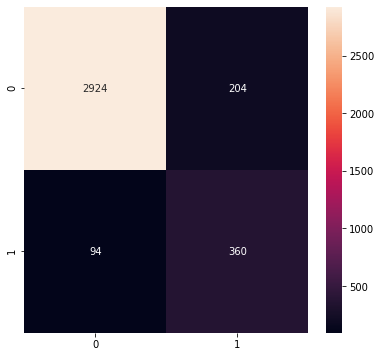

In [26]:
#accuracy calculation
print('Test accuracy of logistic regression: ',accuracy_score(test_pred_lr['class'],test_pred_lr['class_pred']))

#confusion matrix calculation
conf_matrix_lr = pd.DataFrame(confusion_matrix(test_pred_lr['class'],test_pred_lr['class_pred']))

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.heatmap(conf_matrix_lr,annot=True,fmt='g')

* Accuracy is 92%; it is high but the number of misclassified cases especially false positives is also high. When the data is imbalanced just looking at accuracy as a performance measure may be misleading.

#### Part b

* Regularized logistic regression with lasso penalties
* Find ideal lambda based on binomial deviance using 10-fold CV
* Tried values: [0.1,0.5,1,2,5,10,20]

In [27]:
lr_cv = LogisticRegressionCV(Cs=[0.1,0.5,1,2,5,10,20],cv=10,penalty='l1',scoring='neg_log_loss', solver='liblinear',random_state=42)
lr_cv.fit(C_train,L_train)

c:\users\cidem\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegressionCV(Cs=[0.1, 0.5, 1, 2, 5, 10, 20], cv=10, penalty='l1',
                     random_state=42, scoring='neg_log_loss',
                     solver='liblinear')

In [28]:
lr_cv.C_

array([0.5])

* Best reqularization parameter is 0.5

* Predict the class for test data

In [29]:
#Test predictions dataframe
test_pred_lr_cv = pd.DataFrame(lr_cv.predict_proba(C_test)[:,1],columns=['class_pred_proba'],index=C_test.index)
#Join with true labels
test_pred_lr_cv = pd.merge(test_pred_lr_cv,L_test,how='left',left_index=True,right_index=True)
#Convert predicted probabilities to labels using positive ratio of train labels
pos_ratio_train = L_train[L_train['class']==1].sum()[0]/L_train.shape[0]
test_pred_lr_cv['class_pred'] = test_pred_lr_cv['class_pred_proba'].apply(lambda x: 1 if x>=pos_ratio_train else 0)

print('Predicted Class 3 counts: ')
print(test_pred_lr_cv['class_pred'].value_counts().sort_index())
print('Predicted Class 3 percents: ')
print(test_pred_lr_cv['class_pred'].value_counts().sort_index()*100/test_pred_lr_cv.shape[0])

Predicted Class 3 counts: 
0    2905
1     677
Name: class_pred, dtype: int64
Predicted Class 3 percents: 
0    81.099944
1    18.900056
Name: class_pred, dtype: float64


Test accuracy of logistic regression:  0.9193188163037409


<AxesSubplot:>

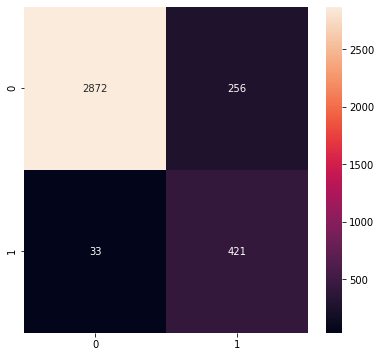

In [30]:
#accuracy calculation
print('Test accuracy of logistic regression: ',accuracy_score(test_pred_lr_cv['class'],test_pred_lr_cv['class_pred']))

#confusion matrix calculation
conf_matrix_lr_cv = pd.DataFrame(confusion_matrix(test_pred_lr_cv['class'],test_pred_lr_cv['class_pred']))

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.heatmap(conf_matrix_lr_cv,annot=True,fmt='g')

* Comparing to non-regularized logistic regression, test accuracy is slightly increased.
* Number of false negatives decreases significantly, number of true positives increases but number of false positives increases.

In [31]:
coef_df = pd.DataFrame(lr_cv.coef_.T,columns=['lr_coefficients'],index=C_train.columns)
nonzero_coef_df = coef_df[coef_df['lr_coefficients']!=0]
print('Number of features: ',coef_df.shape[0])
print('Number of features with nonzero coefficient: ',nonzero_coef_df.shape[0])

Number of features:  945
Number of features with nonzero coefficient:  71


* Only 71 of 945 features are selected using Lasso penalties.

* Distribution of coefficients is as follows:

In [32]:
nonzero_coef_df.describe()

,lr_coefficients
count,71.000000
mean,0.048269
std,0.201911
min,-0.375220
25%,-0.053001
50%,0.009090
75%,0.103866
max,0.888479


In [33]:
nonzero_coef_df.sort_values(by='lr_coefficients')

,lr_coefficients
z180,-0.375220
x88,-0.281406
z257,-0.254234
x44,-0.202512
x43,-0.170289
...,...
x258,0.439836
x282,0.464329
y192,0.524382
x315,0.558377


* Gesture 3 is a movement along horizontal axis but the largest coefficient belongs to a Y-axis feature which is interesting I think.
* Second largest coefficient belongs to an X-axis feature, x315, and second most negative coefficient belongs to x88. This may be a characteristic of the movement from left to right along the X-axis.

#### Part c

* Transform the training data into distance information

In [34]:
C_train.shape

(896, 945)

In [35]:
Dist_train = pd.DataFrame(pairwise_distances(C_train,metric='euclidean'),columns=C_train.index,index=C_train.index)
print('Data shape: ',Dist_train.shape)
Dist_train.head()

Data shape:  (896, 896)


,0,1,2,3,4,5,6,7,8,9,...,886,887,888,889,890,891,892,893,894,895
0,0.000001,51.293618,46.483580,49.992656,40.530982,48.763804,49.759032,34.465672,38.358805,30.467454,...,45.998287,39.732263,41.254377,37.264637,52.614936,34.607660,40.361897,43.576364,47.166592,52.280427
1,51.293618,0.000000,26.156809,36.848468,32.720869,37.629532,38.187191,50.043217,37.792181,57.616499,...,46.037268,49.017386,32.326936,49.033400,34.098151,44.408497,54.640323,41.232393,43.262311,24.420212
2,46.483580,26.156809,0.000000,43.114247,34.699562,34.765189,52.896076,45.077507,39.331217,54.024838,...,49.777627,43.330225,34.885630,48.610187,36.579035,37.878092,49.844313,47.862360,52.755177,23.009897
3,49.992656,36.848468,43.114247,0.000000,45.107982,41.033487,39.722908,55.623540,49.691214,44.887495,...,41.214384,38.468772,47.067160,44.031998,33.652239,43.631306,45.166381,36.472406,37.776852,37.739640
4,40.530982,32.720869,34.699562,45.107982,0.000003,36.565887,44.972623,34.504387,20.728037,48.652605,...,47.372112,53.929069,17.288180,36.797762,49.609557,44.756784,44.698328,45.808059,44.446919,39.771272


In [36]:
Dist_test = pd.DataFrame(pairwise_distances(C_test,C_train,metric='euclidean'),columns=C_train.index,index=C_test.index)
print('Data shape: ',Dist_test.shape)
Dist_test.head()

Data shape:  (3582, 896)


,0,1,2,3,4,5,6,7,8,9,...,886,887,888,889,890,891,892,893,894,895
0,51.675305,13.263797,28.324707,39.543795,34.292119,38.216717,36.039129,48.760841,37.573776,59.441594,...,44.369432,49.496425,32.779842,51.234177,35.242921,43.644030,51.723138,41.003869,41.870182,28.356419
1,34.937340,54.333667,54.691486,46.733851,45.809310,46.541085,41.580827,37.519961,46.178748,31.862629,...,37.759545,42.296461,44.206912,38.793428,50.744631,42.981350,38.354029,44.868284,37.522847,55.650015
2,42.164000,25.576426,35.866337,42.167983,28.762888,37.985773,41.082112,44.307619,31.100315,50.165605,...,46.952762,50.509239,30.284144,39.447117,45.672632,47.542085,50.373063,40.436117,43.686643,35.517796
3,41.833812,34.269911,41.871457,44.824296,25.508375,43.308444,38.761995,38.392620,20.189033,50.358768,...,45.176411,53.912401,28.356367,42.598066,48.736481,49.678075,44.158698,42.846879,42.655219,41.601013
4,49.648664,14.391961,16.509483,41.318588,32.753029,37.123207,44.963612,47.172622,37.879103,57.181936,...,47.816826,46.926271,32.789785,49.983623,34.784586,40.951154,53.623249,46.640863,47.720880,22.216240


* Regularized logistic regression with lasso penalties
* Find ideal lambda based on binomial deviance using 10-fold CV
* Tried values: [0.1,0.5,1,2,5,10,20]

In [37]:
distance_lr_cv = LogisticRegressionCV(Cs=[0.1,0.5,1,2,5,10,20],cv=10,penalty='l1',scoring='neg_log_loss', solver='liblinear',random_state=42)
distance_lr_cv.fit(Dist_train,L_train)

c:\users\cidem\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegressionCV(Cs=[0.1, 0.5, 1, 2, 5, 10, 20], cv=10, penalty='l1',
                     random_state=42, scoring='neg_log_loss',
                     solver='liblinear')

In [38]:
distance_lr_cv.C_

array([5.])

* Best reqularization parameter is 5 this time

* Predict the class for test data

In [39]:
#Test predictions dataframe
test_pred_distance_lr_cv = pd.DataFrame(distance_lr_cv.predict_proba(Dist_test)[:,1],columns=['class_pred_proba'],index=Dist_test.index)
#Join with true labels
test_pred_distance_lr_cv = pd.merge(test_pred_distance_lr_cv,L_test,how='left',left_index=True,right_index=True)
#Convert predicted probabilities to labels using positive ratio of train labels
pos_ratio_train = L_train[L_train['class']==1].sum()[0]/L_train.shape[0]
test_pred_distance_lr_cv['class_pred'] = test_pred_distance_lr_cv['class_pred_proba'].apply(lambda x: 1 if x>=pos_ratio_train else 0)

print('Predicted Class 3 counts: ')
print(test_pred_distance_lr_cv['class_pred'].value_counts().sort_index())
print('Predicted Class 3 percents: ')
print(test_pred_distance_lr_cv['class_pred'].value_counts().sort_index()*100/test_pred_distance_lr_cv.shape[0])

Predicted Class 3 counts: 
0    3123
1     459
Name: class_pred, dtype: int64
Predicted Class 3 percents: 
0    87.18593
1    12.81407
Name: class_pred, dtype: float64


Test accuracy of logistic regression:  0.9852037967615858


<AxesSubplot:>

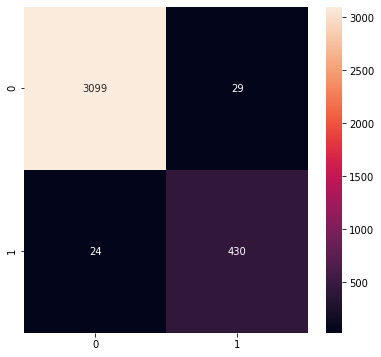

In [40]:
#accuracy calculation
print('Test accuracy of logistic regression: ',accuracy_score(test_pred_distance_lr_cv['class'],test_pred_distance_lr_cv['class_pred']))

#confusion matrix calculation
conf_matrix_distance_lr_cv = pd.DataFrame(confusion_matrix(test_pred_distance_lr_cv['class'],test_pred_distance_lr_cv['class_pred']))

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.heatmap(conf_matrix_distance_lr_cv,annot=True,fmt='g')

* Accuracy is improved significantly comparing to part b.
* Also, number of false positives decreases significantly. 

In [41]:
distance_coef_df = pd.DataFrame(distance_lr_cv.coef_.T,columns=['lr_coefficients'],index=Dist_train.columns)
distance_nonzero_coef_df = distance_coef_df[distance_coef_df['lr_coefficients']!=0]
print('Number of features: ',distance_coef_df.shape[0])
print('Number of features with nonzero coefficient: ',distance_nonzero_coef_df.shape[0])

Number of features:  896
Number of features with nonzero coefficient:  762


* Applying Lasso penalties does not reduce number of features as it does in part b. It selects 762 features out of 896.

* Distribution of coefficients is as follows:

In [42]:
distance_nonzero_coef_df.describe()

,lr_coefficients
count,762.000000
mean,-0.000289
std,0.026665
min,-0.159959
25%,-0.007041
50%,0.000647
75%,0.010920
max,0.095921


In [43]:
#sorted by coefficient
distance_nonzero_coef_df.sort_values(by='lr_coefficients')

,lr_coefficients
98,-0.159959
731,-0.147665
188,-0.144815
3,-0.137763
777,-0.124007
...,...
283,0.077856
122,0.082322
123,0.090825
208,0.094030


In [44]:
#joined with train labels and sorted by coefficient
distance_nonzero_coef_df = pd.merge(distance_nonzero_coef_df,L_train,how='left',left_index=True, right_index=True).sort_values(by='lr_coefficients')
distance_nonzero_coef_df

,lr_coefficients,class
98,-0.159959,1
731,-0.147665,1
188,-0.144815,1
3,-0.137763,1
777,-0.124007,1
...,...,...
283,0.077856,0
122,0.082322,0
123,0.090825,0
208,0.094030,0


* Distribution of coefficients grouped by train labels is as follows:

In [45]:
distance_nonzero_coef_df.groupby('class').describe()

lr_coefficients                                                    \
                count      mean       std       min       25%       50%   
class                                                                     
0               656.0  0.006549  0.017107 -0.035833 -0.001162  0.003518   
1               106.0 -0.042605  0.035037 -0.159959 -0.054451 -0.032117   

                           
            75%       max  
class                      
0      0.012171  0.095921  
1     -0.019053  0.004304

* Here features indicates distance from a train sample.
* We can see that if the corresponding train sample is labeled as 1 then the coefficient is negative mostly and the reverse is true for 0-labeled samples.
* It makes sense because distance between a test and a train sample is inversely proportional to the probability of having similar labels of those samples.

#### Part d

* First in Task 1, I use KNN with two different distance measures: Euclidean and Manhattan.
    * Test accuracy using Euclidean distanced KNN over all labels : 0.94
    * Test accuracy using Manhattan distanced KNN over all labels : 0.95
    
    Using Manhattan distance seems to work better on this dataset.
    
* Now I will measure accuracies of those two methods over Class 3 to be able to compare their results with the ones in Task 2.

Test accuracy of KNN (Euclidean) over Class3 labels:  0.9846454494695701


<AxesSubplot:>

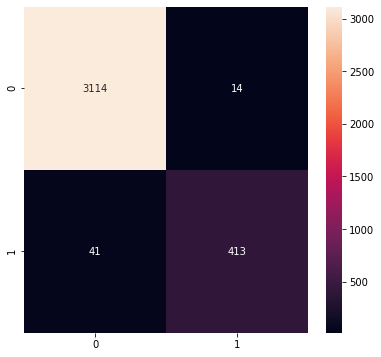

In [46]:
knn_euc_test_labels_c3 = knn_euc_test_labels.copy()
knn_euc_test_labels_c3['class_pred']=knn_euc_test_labels_c3['class_pred'].apply(lambda x: 1 if x==3 else 0)
knn_euc_test_labels_c3['class']=knn_euc_test_labels_c3['class'].apply(lambda x: 1 if x==3 else 0)
print('Test accuracy of KNN (Euclidean) over Class3 labels: ',accuracy_score(knn_euc_test_labels_c3['class'],knn_euc_test_labels_c3['class_pred']))

#confusion matrix calculation
conf_knn_euc_test_labels = pd.DataFrame(confusion_matrix(knn_euc_test_labels_c3['class'],knn_euc_test_labels_c3['class_pred']))

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.heatmap(conf_knn_euc_test_labels,annot=True,fmt='g')

Test accuracy of KNN (Manhattan) over Class3 labels:  0.9865996649916248


<AxesSubplot:>

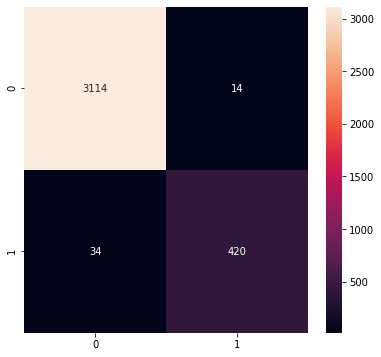

In [47]:
knn_man_test_labels_c3 = knn_man_test_labels.copy()
knn_man_test_labels_c3['class_pred']=knn_man_test_labels_c3['class_pred'].apply(lambda x: 1 if x==3 else 0)
knn_man_test_labels_c3['class']=knn_man_test_labels_c3['class'].apply(lambda x: 1 if x==3 else 0)
print('Test accuracy of KNN (Manhattan) over Class3 labels: ',accuracy_score(knn_man_test_labels_c3['class'],knn_man_test_labels_c3['class_pred']))

#confusion matrix calculation
conf_knn_man_test_labels = pd.DataFrame(confusion_matrix(knn_man_test_labels_c3['class'],knn_man_test_labels_c3['class_pred']))

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.heatmap(conf_knn_man_test_labels,annot=True,fmt='g')

* Test accuracies of alternative methods for prediction of Class 3 labels:
    * KNN (Euclidean): 0.9846454494695701
    * KNN (Manhattan): 0.9865996649916248
    * Logistic Regression: 0.9168062534896706
    * Regularized Logistic Regression with Lasso Penalties: 0.9193188163037409
    * Regularized Logistic Regression with Lasso Penalties with distance features: 0.9852037967615858
    
* Best method in terms of test accuracy is KNN with k = 3 and Manhattan distances
* Test accuracies of Regularized Logistic Regression with Lasso Penalties with distance features and KNN with k = 3 and Euclidean distances are very closed to the best one
* Test accuracies of Logistic Regression and Regularized Logistic Regression with Lasso Penalties are very close to each other but approximately %6.7 less than the best one
* It seems that there is a nonlinear relationship between the labels and the inputs because KNN and Regularized LR with distance information perform better than LR and Regularized LR with original features.